# Homework 3 - Kenwan Cheung - NLP

You have two zip files included into this assignment:

Assignment Articles.zip
Assignment Books.zip
You need to determine which articles (from Assignment Articles.zip) are similar to each other and which books (from Assignment Books.zip) are more similar to each other.  In order to accomplish this you need to create n-grams (a.k.a. shingles) and compare the similarity of the text using Jaccard distance.

Your final submission must include the following:

Which articles / books were similar and which ones were dissimilar?
A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
Was the “n” identical or different for books vs. articles and why
Visualize the selection of “n”
Include all of your program codes (creating n-grams from text as well as selecting the “n” for analysis)
Additional instructions:

You have a starter code in a Python Notebook, however you are welcome to use any software of your choice to complete assignment
Try to limit your submission to no more than two pages in MS Word document
Visualize your results instead of writing about them. Remember, a picture is worth a thousand words


In [137]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

### Import functions

Some functions to ingest the data

In [285]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

### Load the data in

In [3]:
dir_b = '../wk3/Assignment 3 Books/'
dir_a = '../wk3/Assignment 3 Articles/'

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir_b,ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

### We've run the function to load the data and run ngrams

The function returns the jaccard similarity (intersection / (total - intersection)) of the lists. We can plot them below.

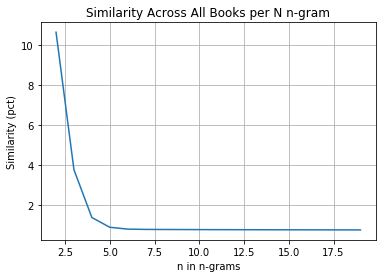

In [5]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

### Discussion 

If we pick n = 5, we hit the elbow plot where additional complexity does not lead to a change in similarity. This seems like an optimal point.

### Running on articles

In [6]:
x_a = []
y_a = []
yall_a = []

for n in range(2,20):
        
    books_comparison = compare_files(dir_a,ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x_a.append(n)
    yall_a.append(a*100)
    y_a.append(a.mean()*100)

### We've run the function to load the data and run ngrams

The function returns the jaccard similarity (intersection / (total - intersection)) of the lists. We can plot them below.

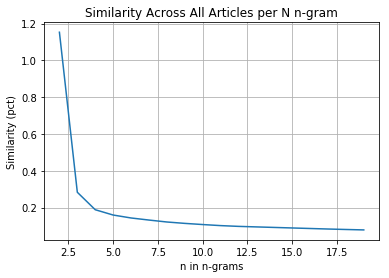

In [7]:
plt.plot(x_a,y_a, linestyle = '-')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

### Discussion

We should pick a higher ngram for articles than books, interestingly enough.

An n of ~ 8 is probably better fit for articles. If I had to guess, the shorter nature means we need more information from each to get a stable similarity metric.

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir_b,ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

### We've run the function to load the data and run ngrams

The function returns the jaccard similarity (intersection / (total - intersection)) of the lists. We can plot them below.

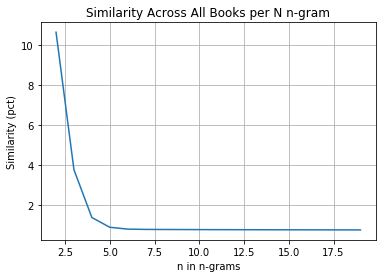

In [5]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

## Now that we've found optimal n, let's proceed

### Books first

First let's set up a dataframe to properly store the results so we can visualize.

In [212]:
columns = ['book1','book2','similarity']

In [213]:
matrix_book = pd.DataFrame(columns=columns,data=None)

In [214]:
books_comparison = compare_files(dir_b,ngram_size=5,threshold=0)
counter = 0

for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
#     print ("1")
#     print (str(book1) + " is similar to " + str(book2) + 
#            " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")
    data = np.array([book1,book2,similarity_index*100])
    matrix_book = matrix_book.append(pd.DataFrame([data], [counter], columns))
    counter += 1

### Now some data manipulation

In [243]:
results_b = matrix_book.sort_values(['book1','book2'],ascending=[1,1])

In [244]:
results_b = results_b.reset_index(drop=True)
results_b

,book1,book2,similarity
0,3boat10.txt,Adventures_of_Sherlock_Holmes.txt,0.06668544590143201
1,3boat10.txt,Hound_of_the_Baskervilles.txt,0.04186663151937107
2,3boat10.txt,Return_of_Sherlock_Holmes.txt,0.04568773807164718
3,Adventures_of_Sherlock_Holmes.txt,Hound_of_the_Baskervilles.txt,1.8384017677636704
4,Adventures_of_Sherlock_Holmes.txt,Return_of_Sherlock_Holmes.txt,1.5270746202949592
5,Hound_of_the_Baskervilles.txt,Return_of_Sherlock_Holmes.txt,1.7962481962481962


In [245]:
results_b = results_b.pivot(index='book1',
                            columns='book2',
                            values='similarity')
results_b = results_b[results_b.columns].astype(float)  # or int

In [248]:
print(results_b)

book2                              Adventures_of_Sherlock_Holmes.txt  \
book1                                                                  
3boat10.txt                                                 0.066685   
Adventures_of_Sherlock_Holmes.txt                                NaN   
Hound_of_the_Baskervilles.txt                                    NaN   

book2                              Hound_of_the_Baskervilles.txt  \
book1                                                              
3boat10.txt                                             0.041867   
Adventures_of_Sherlock_Holmes.txt                       1.838402   
Hound_of_the_Baskervilles.txt                                NaN   

book2                              Return_of_Sherlock_Holmes.txt  
book1                                                             
3boat10.txt                                             0.045688  
Adventures_of_Sherlock_Holmes.txt                       1.527075  
Hound_of_the_Baskervilles.txt 

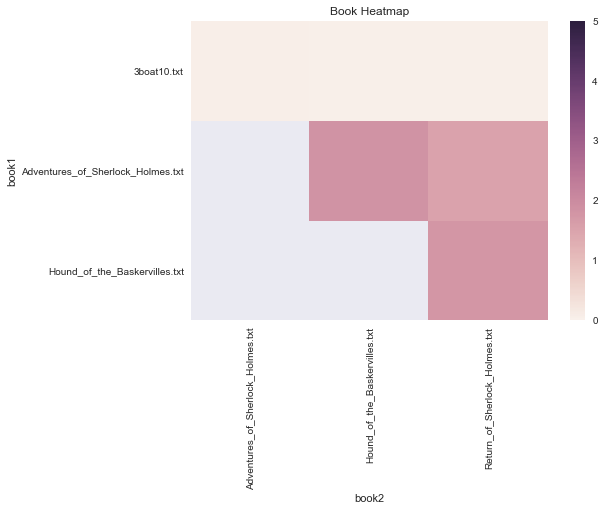

In [276]:
sns.heatmap(data=results_b,vmin=0, vmax=5)
plt.title("Book Heatmap")
plt.show()

### Discussion

While the texts themselves show little similarity the Sherlock holmes did share a much higher level than compared to the boat text which makes sense!

All in all, the results make sense!

## Articles second

In [286]:
columns_a = ['art1','art2','similarity']

In [287]:
matrix_a = pd.DataFrame(columns=columns_a,data=None)

In [288]:
articles_comparison = compare_files(dir_a,ngram_size=8,threshold=0)
counter = 0

for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    data = np.array([art1,art2,similarity_index*100])
    matrix_a = matrix_a.append(pd.DataFrame([data], [counter], columns_a))
    counter += 1

### Now some data manipulation

In [289]:
results_a = matrix_a.sort_values(['art1','art2'],ascending=[1,1])

In [290]:
results_a = results_a.reset_index(drop=True)
results_a

,art1,art2,similarity
0,article10.txt,article13.txt,12.628865979381443
1,article10.txt,article14.txt,0.468384074941452
2,article10.txt,article6.txt,3.5667107001321003
3,article14.txt,article6.txt,3.2692307692307696
4,article16.txt,article17.txt,67.67676767676768
5,article26.txt,article28.txt,2.73972602739726
6,article26.txt,article31.txt,2.684563758389262
7,article28.txt,article31.txt,1.6666666666666667


In [291]:
results_a = results_a.pivot(index='art1',
                            columns='art2',
                            values='similarity')
results_a = results_a[results_a.columns].astype(float)  # or int

In [292]:
print(results_a)

art2           article13.txt  article14.txt  article17.txt  article28.txt  \
art1                                                                        
article10.txt      12.628866       0.468384            NaN            NaN   
article14.txt            NaN            NaN            NaN            NaN   
article16.txt            NaN            NaN      67.676768            NaN   
article26.txt            NaN            NaN            NaN       2.739726   
article28.txt            NaN            NaN            NaN            NaN   

art2           article31.txt  article6.txt  
art1                                        
article10.txt            NaN      3.566711  
article14.txt            NaN      3.269231  
article16.txt            NaN           NaN  
article26.txt       2.684564           NaN  
article28.txt       1.666667           NaN  


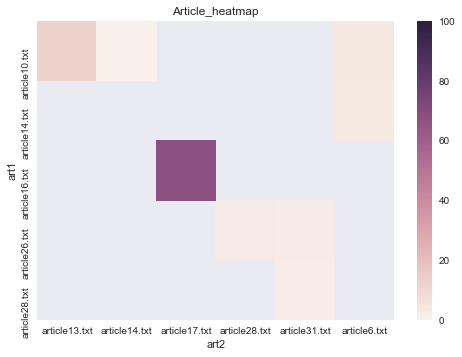

In [293]:
sns.heatmap(data=results_a,vmin=0, vmax=100)
plt.title("Article_heatmap")
plt.show()

### Discussion

We can see that the articles in general show much higher similarity scoresthan the books (scale of y axis is 0-100 now!). However, the vast majority of articles show little similarity at all, which is interesting. Given the shorter format vs the books, it seems highly likely to have no overlap is the subjects where completely different